In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [12]:
py = pd.read_csv('../data/logs/py_log.csv')
m = pd.read_csv('../data/logs/m_log.csv')
jl = pd.read_csv('../data/logs/jl_log.csv')
R = pd.read_csv('../data/logs/R_log.csv')

In [13]:
round(py.describe(), 3).to_csv('../data/stats_run/py.csv')
round(m.describe(), 3).to_csv('../data/stats_run/m.csv')
round(jl.describe(), 3).to_csv('../data/stats_run/jl.csv')
round(R.describe(), 3).to_csv('../data/stats_run/R.csv')

Kruskal-Wallis test statistic: 3523.203, p-value: 0.000
Significant differences found among the groups.
This indicates that at least one group's median significantly differs from the others.


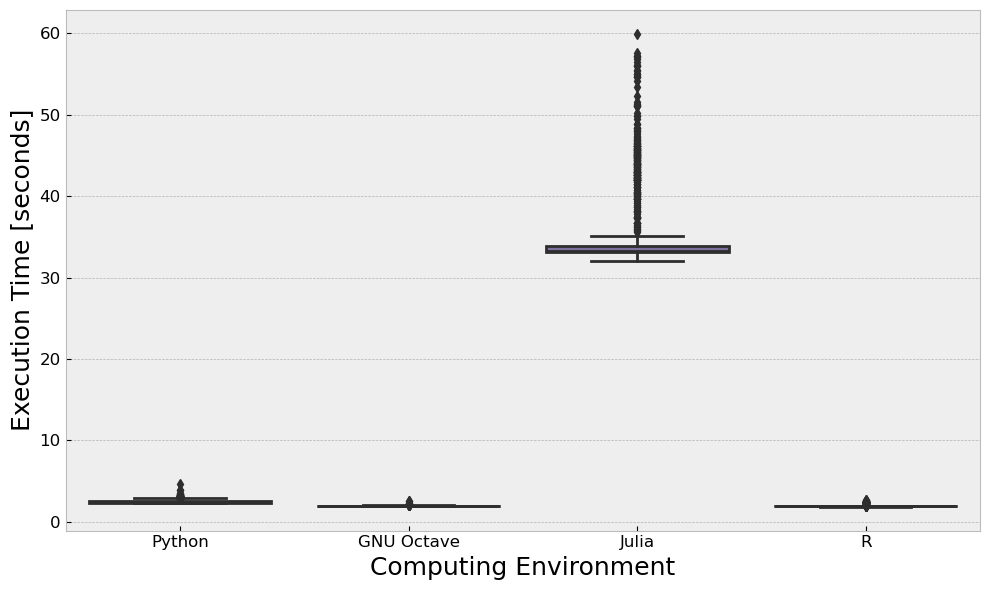

In [14]:
all_data = [py['runtime'], m['runtime'], jl['runtime'], R['runtime']]
labels = ['Python', 'GNU Octave', 'Julia', 'R']

# Prepare data for Dunn's test by creating a DataFrame
data_stacked = np.concatenate(all_data)
groups = np.concatenate([[label] * len(data) for data, label in zip(all_data, labels)])
df_dunn = pd.DataFrame({'Execution Time': data_stacked, 'Group': groups})

# Visualizations for each group
# Create and save a Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Execution Time', data=df_dunn)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Computing Environment', fontsize=18)
plt.ylabel('Execution Time [seconds]', fontsize=18)
plt.tight_layout()
plt.savefig('../figs/fig2a.png', dpi=450)

alpha = 0.05

# Perform the Kruskal-Wallis test
kw_stat, kw_pvalue = stats.kruskal(*all_data)

# Print the Kruskal-Wallis test results
print(f'Kruskal-Wallis test statistic: {kw_stat:.3f}, p-value: {kw_pvalue:.3f}')
if kw_pvalue < alpha:
    print("Significant differences found among the groups.")
    print("This indicates that at least one group's median significantly differs from the others.")
else:
    print("No significant differences found among the groups.")
    print("This suggests that there is no statistical evidence to conclude that the groups differ in median.")


In [15]:
# Proceed with Dunn's post-hoc test if significant
if kw_pvalue < alpha:
# Dunn's post-hoc test with Bonferroni adjustment
    dunn_pvalues = sp.posthoc_dunn(df_dunn, val_col='Execution Time', group_col='Group', p_adjust='bonferroni')

    # Print Dunn's test results
    print("Dunn's test p-values (Bonferroni adjusted):")
    print(dunn_pvalues.round(3))
    print("Values below 0.05 indicate pairs of groups with statistically significant differences in medians.")

Dunn's test p-values (Bonferroni adjusted):
            GNU Octave  Julia  Python    R
GNU Octave         1.0    0.0     0.0  0.0
Julia              0.0    1.0     0.0  0.0
Python             0.0    0.0     1.0  0.0
R                  0.0    0.0     0.0  1.0
Values below 0.05 indicate pairs of groups with statistically significant differences in medians.


Kruskal-Wallis test statistic: 3375.563, p-value: 0.000
Significant differences found among the groups.
This indicates that at least one group's median significantly differs from the others.


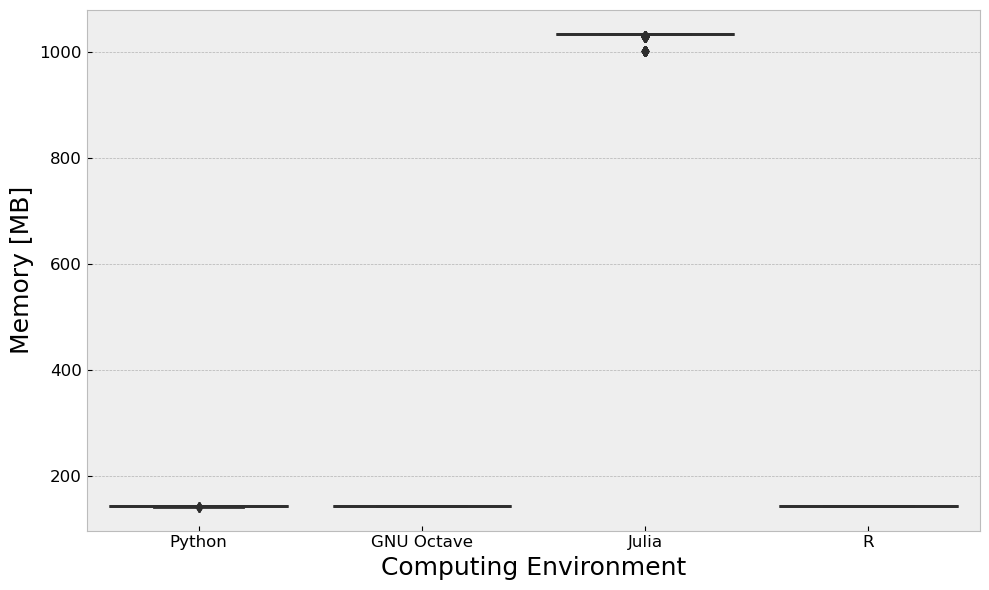

In [17]:
all_data = [py['memory'], m['memory'], jl['memory'], R['memory']]
labels = ['Python', 'GNU Octave', 'Julia', 'R']

# Prepare data for Dunn's test by creating a DataFrame
data_stacked = np.concatenate(all_data)
groups = np.concatenate([[label] * len(data) for data, label in zip(all_data, labels)])
df_dunn = pd.DataFrame({'Memory Usage': data_stacked, 'Group': groups})

# Visualizations for each group
# Create and save a Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Memory Usage', data=df_dunn)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Computing Environment', fontsize=18)
plt.ylabel('Memory [MB]', fontsize=18)
plt.tight_layout()
plt.savefig('../figs/fig2b.png', dpi=450)

alpha = 0.05

# Perform the Kruskal-Wallis test
kw_stat, kw_pvalue = stats.kruskal(*all_data)

# Print the Kruskal-Wallis test results
print(f'Kruskal-Wallis test statistic: {kw_stat:.3f}, p-value: {kw_pvalue:.3f}')
if kw_pvalue < alpha:
    print("Significant differences found among the groups.")
    print("This indicates that at least one group's median significantly differs from the others.")
else:
    print("No significant differences found among the groups.")
    print("This suggests that there is no statistical evidence to conclude that the groups differ in median.")


In [18]:
# Proceed with Dunn's post-hoc test if significant
if kw_pvalue < alpha:
# Dunn's post-hoc test with Bonferroni adjustment
    dunn_pvalues = sp.posthoc_dunn(df_dunn, val_col='Memory Usage', group_col='Group', p_adjust='bonferroni')

    # Print Dunn's test results
    print("Dunn's test p-values (Bonferroni adjusted):")
    print(dunn_pvalues.round(3))
    print("Values below 0.05 indicate pairs of groups with statistically significant differences in medians.")

Dunn's test p-values (Bonferroni adjusted):
            GNU Octave  Julia  Python    R
GNU Octave         1.0    0.0     0.0  1.0
Julia              0.0    1.0     0.0  0.0
Python             0.0    0.0     1.0  0.0
R                  1.0    0.0     0.0  1.0
Values below 0.05 indicate pairs of groups with statistically significant differences in medians.
